In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets_33080_43333_car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df['Age'] = 2020 - df['Year']

In [4]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Age              0
dtype: int64

In [6]:
df.drop(['Car_Name', 'Year'], axis = 1, inplace = True)

In [7]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [8]:
df = pd.get_dummies(df, drop_first = True)

In [9]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [10]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


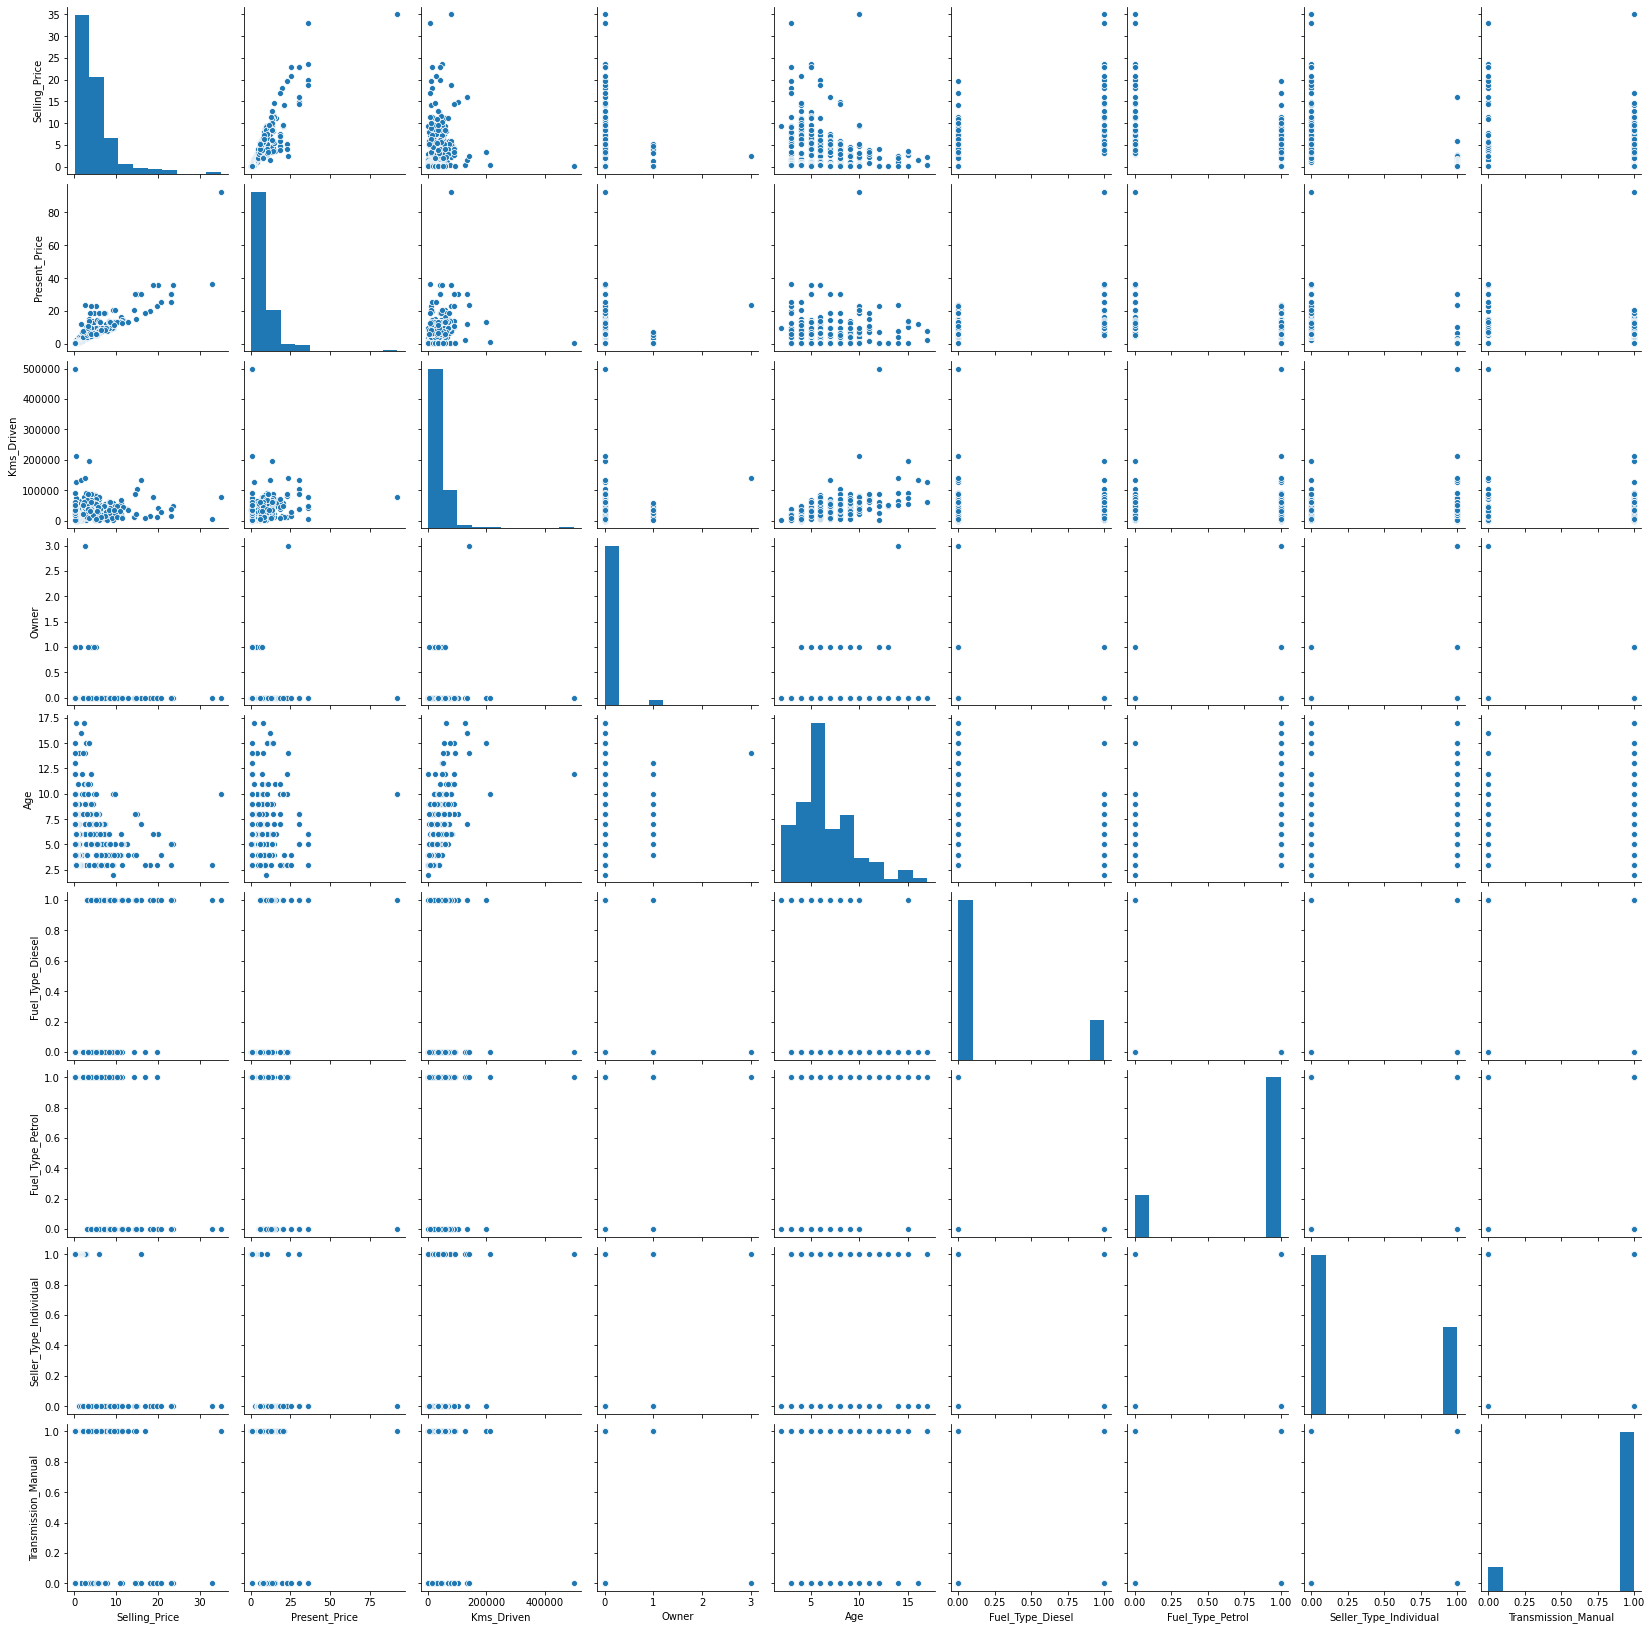

In [11]:
sns.pairplot(df)

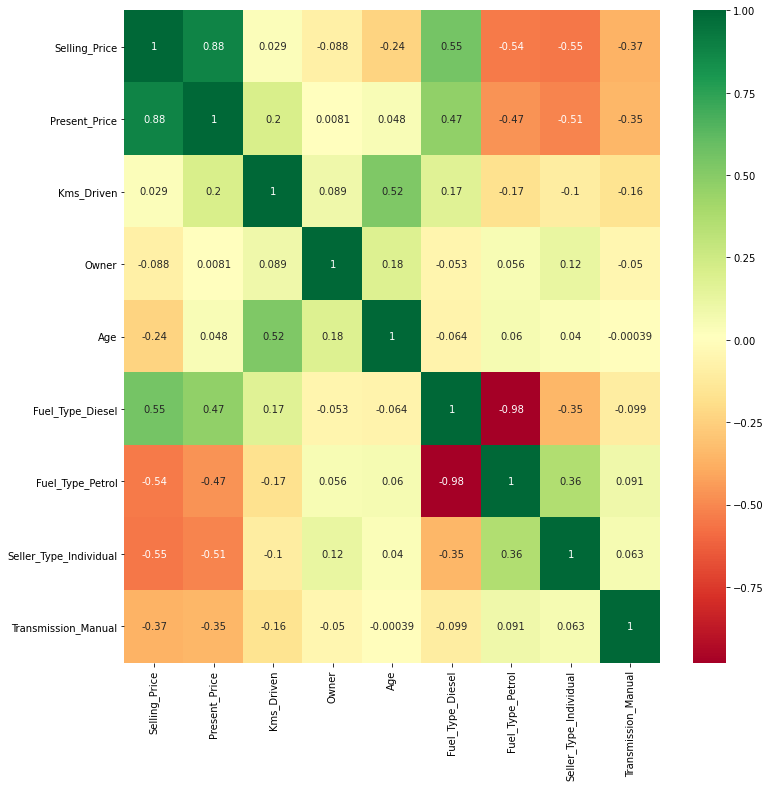

In [12]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot = True, cmap="RdYlGn")

## Separate Features and Labels

In [13]:
x = df.iloc[:, 1:9]
y = df.iloc[:,0]

In [14]:
x.head()

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [15]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

## Feature Importance

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

model = ExtraTreesRegressor()

In [18]:
model.fit(x,y)

ExtraTreesRegressor()

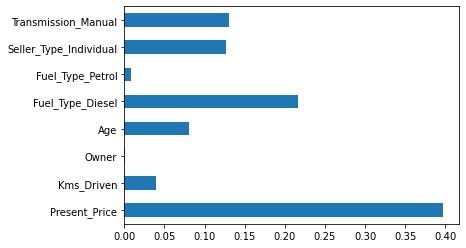

In [19]:
pd.Series(model.feature_importances_, index = x.columns).plot(kind = 'barh')


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [21]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()

## Preparing For Hyperparameter Tuning

In [22]:
#number of trees
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
#tree height
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]
max_depth.append(None)
#min samples to split a node
min_samples_split = [2, 5, 10, 15, 100]
#min number of leaves at each node
min_samples_leaf = [1,2,5,10]
#number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

In [23]:
distributions = {'n_estimators':n_estimators,
                 'max_depth': max_depth,
                 'min_samples_split':min_samples_split,
                 'min_samples_leaf': min_samples_leaf,
                 'max_features': max_features}

In [24]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(reg, distributions, scoring = 'neg_mean_absolute_error' , random_state=0)

In [25]:
clf.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_absolute_error')

In [26]:
clf.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 20}

In [27]:
clf.best_score_

-0.9661955558431556

In [28]:
prediction  = clf.predict(x_test)

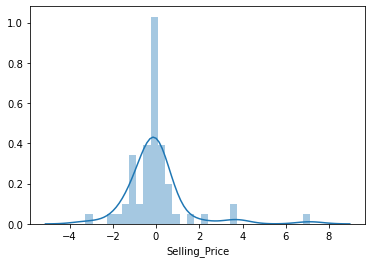

In [29]:
sns.distplot(y_test-prediction)

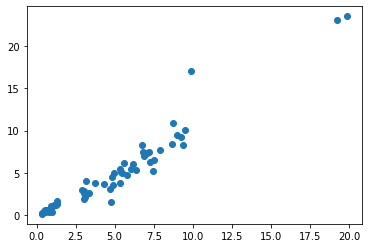

In [30]:
plt.scatter(prediction, y_test)

In [31]:
import pickle

In [32]:
clf.best_estimator_

RandomForestRegressor(max_depth=20, max_features='log2', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=900)

## Pickle the classifier to deploy later

In [33]:
file = open('RandomForestRegressor.pkl', 'wb')
pickle.dump(clf, file)